In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [1]:
data = pd.read_csv('clean_data.csv')
data.head()

NameError: name 'pd' is not defined

In [ ]:
site_mapping = {'Momondo': 0, 'Kayak': 1}
data_copy['Site'] = data_copy['Site'].map(site_mapping)

print("üîπ Site Mapping:", site_mapping)
print(data_copy['Site'].unique())  # ◊ú◊ï◊ï◊ì◊ê ◊©◊ô◊© ◊®◊ß 0 ◊ï-1


üîπ Site Mapping: {'Momondo': 0, 'Kayak': 1}
[0 1]


In [ ]:
import pandas as pd

# üéØ ◊©◊ú◊ë 1: ◊¢◊ì◊õ◊ï◊ü ◊û◊ô◊ú◊ï◊ü ◊û◊ô◊ì◊¢ ◊¢◊ú ◊©◊ì◊ï◊™ ◊î◊™◊¢◊ï◊§◊î ◊õ◊ï◊ú◊ú SOU
airports_info = {
    'London': {
        'Heathrow': {'code': 'LHR', 'distance_from_city_center(km)': '23'},
        'Gatwick': {'code': 'LGW', 'distance_from_city_center(km)': '45'},
        'Stansted': {'code': 'STN', 'distance_from_city_center(km)': '64'},
        'Luton': {'code': 'LTN', 'distance_from_city_center(km)': '56'},
        'City': {'code': 'LCY', 'distance_from_city_center(km)': '11'},
        'Southend': {'code': 'SEN', 'distance_from_city_center(km)': '64'},
        'Southampton': {'code': 'SOU', 'distance_from_city_center(km)': '110'},  # ‚úÖ ◊î◊ï◊°◊§◊†◊ï ◊ê◊™ SOU
    },
    'Rome': {
        'Fiumicino': {'code': 'FCO', 'distance_from_city_center(km)': '32'},
        'Ciampino': {'code': 'CIA', 'distance_from_city_center(km)': '15'},
    },
    'Paris': {
        'Charles de Gaulle': {'code': 'CDG', 'distance_from_city_center(km)': '25'},
        'Orly': {'code': 'ORY', 'distance_from_city_center(km)': '13'},
        'Beauvais-Tille': {'code': 'BVA', 'distance_from_city_center(km)': '85'},
    }
}

# üéØ ◊©◊ú◊ë 2: ◊ô◊¶◊ô◊®◊™ ◊û◊ô◊ú◊ï◊ü ◊™◊®◊í◊ï◊ù ◊û◊©◊ì◊î ◊™◊¢◊ï◊§◊î ◊ú◊û◊®◊ó◊ß ◊û◊û◊®◊õ◊ñ ◊î◊¢◊ô◊®
airport_distances = {}

for city, airports in airports_info.items():
    for airport_name, details in airports.items():
        if 'distance_from_city_center(km)' in details:
            if 'code' in details:
                airport_code = details['code'].upper()  # ◊î◊§◊ô◊õ◊™ ◊ß◊ï◊ì ◊ú◊ê◊ï◊™◊ô◊ï◊™ ◊í◊ì◊ï◊ú◊ï◊™
                airport_distances[airport_code] = float(details['distance_from_city_center(km)'])  # ◊î◊û◊®◊î ◊ú-float

# üéØ ◊©◊ú◊ë 3: ◊§◊ï◊†◊ß◊¶◊ô◊î ◊ú◊û◊¶◊ô◊ê◊™ ◊î◊û◊®◊ó◊ß ◊ú◊§◊ô ◊ß◊ï◊ì ◊©◊ì◊î ◊™◊¢◊ï◊§◊î
def get_airport_distance(airport):
    if pd.isna(airport):  # ◊ê◊ù ◊î◊¢◊®◊ö ◊ó◊°◊®, ◊†◊ó◊ñ◊ô◊® None
        return None
    return airport_distances.get(airport.upper(), None)  # ◊î◊©◊ï◊ï◊ê◊î ◊ú◊§◊ô ◊ß◊ï◊ì ◊ë◊ê◊ï◊™◊ô◊ï◊™ ◊í◊ì◊ï◊ú◊ï◊™

# üéØ ◊©◊ú◊ë 4: ◊î◊ï◊°◊§◊™ ◊î◊û◊®◊ó◊ß◊ô◊ù ◊ú◊õ◊ú ◊©◊ì◊î ◊™◊¢◊ï◊§◊î ◊ë◊ò◊ë◊ú◊î
data_copy['Onward Departure Airport Distance'] = data_copy['Onward Departure Airport'].apply(get_airport_distance)
data_copy['Onward Arrival Airport Distance'] = data_copy['Onward Arrival Airport'].apply(get_airport_distance)
data_copy['Return Departure Airport Distance'] = data_copy['Return Departure Airport'].apply(get_airport_distance)
data_copy['Return Arrival Airport Distance'] = data_copy['Return Arrival Airport'].apply(get_airport_distance)

# üéØ ◊©◊ú◊ë 5: ◊ë◊ì◊ô◊ß◊ï◊™ ◊ú◊ï◊ï◊ì◊ê ◊©◊î◊™◊î◊ú◊ô◊ö ◊¢◊ë◊ì
print("üìå ◊ë◊ì◊ô◊ß◊™ ◊¢◊®◊õ◊ô◊ù ◊ô◊ô◊ó◊ï◊ì◊ô◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊î◊û◊®◊ó◊ß:")
print(data_copy[['Onward Departure Airport Distance', 'Onward Arrival Airport Distance',
                 'Return Departure Airport Distance', 'Return Arrival Airport Distance']].isnull().sum())  # ◊ú◊ï◊ï◊ì◊ê ◊©◊ê◊ô◊ü NaN

# üéØ ◊©◊ú◊ë 6: ◊î◊¶◊í◊™ ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ú◊ë◊ì◊ô◊ß◊î
print("üìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ú◊ê◊ó◊® ◊î◊™◊ô◊ß◊ï◊ü:")
display(data_copy[['Onward Departure Airport', 'Onward Departure Airport Distance',
                 'Onward Arrival Airport', 'Onward Arrival Airport Distance',
                 'Return Departure Airport', 'Return Departure Airport Distance',
                 'Return Arrival Airport', 'Return Arrival Airport Distance']].sample(10))

# üéØ ◊î◊õ◊ú ◊†◊ß◊ô! üöÄ


üìå ◊ë◊ì◊ô◊ß◊™ ◊¢◊®◊õ◊ô◊ù ◊ô◊ô◊ó◊ï◊ì◊ô◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊î◊û◊®◊ó◊ß:
Onward Departure Airport Distance    0
Onward Arrival Airport Distance      0
Return Departure Airport Distance    0
Return Arrival Airport Distance      0
dtype: int64
üìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ú◊ê◊ó◊® ◊î◊™◊ô◊ß◊ï◊ü:


Onward Departure Airport  Onward Departure Airport Distance  \
113837                      FCO                               32.0   
15913                       CIA                               15.0   
42415                       FCO                               32.0   
41420                       FCO                               32.0   
10431                       CDG                               25.0   
114143                      FCO                               32.0   
65021                       LGW                               45.0   
20286                       CIA                               15.0   
21542                       CIA                               15.0   
159065                      FCO                               32.0   

       Onward Arrival Airport  Onward Arrival Airport Distance  \
113837                    ORY                             13.0   
15913                     STN                             64.0   
42415                     CDG                             25.0   
41420                     CDG                             25.0   
10431                     FCO                             32.0   
114143                    LGW                             45.0   
65021                     FCO                             32.0   
20286                     STN                             64.0   
21542                     STN                             64.0   
159065                    LGW                             45.0   

       Return Departure Airport  Return Departure Airport Distance  \
113837                      ORY                               13.0   
15913                       LGW                               45.0   
42415                       CDG                               25.0   
41420                       CDG                               25.0   
10431                       FCO                               32.0   
114143                      STN                               64.0   
65021                       FCO                               32.0   
20286                       LGW                               45.0   
21542                       LGW                               45.0   
159065                      LGW                               45.0   

       Return Arrival Airport  Return Arrival Airport Distance  
113837                    FCO                             32.0  
15913                     FCO                             32.0  
42415                     FCO                             32.0  
41420                     FCO                             32.0  
10431                     BVA                             85.0  
114143                    CIA                             15.0  
65021                     LGW                             45.0  
20286                     FCO                             32.0  
21542                     FCO                             32.0  
159065                    FCO                             32.0

In [ ]:
# üéØ ◊ë◊ì◊ô◊ß◊î ◊©◊ú ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊õ◊ú ◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ì◊ê◊ò◊î
missing_values = data_copy.isnull().sum()
missing_values = missing_values[missing_values > 0]  # ◊†◊¶◊ô◊í ◊®◊ß ◊¢◊û◊ï◊ì◊ï◊™ ◊¢◊ù ◊¢◊®◊õ◊ô◊ù ◊ó◊°◊®◊ô◊ù

# ◊î◊¶◊í◊™ ◊î◊™◊ï◊¶◊ê◊î
if missing_values.empty:
    print("‚úÖ ◊ê◊ô◊ü ◊†◊™◊ï◊†◊ô◊ù ◊ó◊°◊®◊ô◊ù! ◊õ◊ú ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊û◊ú◊ê◊ï◊™. üöÄ")
else:
    print("‚ö† ◊†◊û◊¶◊ê◊ï ◊†◊™◊ï◊†◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ë◊ê◊ï◊™:")
    display(missing_values)


‚ö† ◊†◊û◊¶◊ê◊ï ◊†◊™◊ï◊†◊ô◊ù ◊ó◊°◊®◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ë◊ê◊ï◊™:


Onward Flight Connection Airport    177679
Return Flight Connection Airport    177657
dtype: int64

In [ ]:
print(data_copy[['Departure DateTime', 'Return DateTime', 'Arrival DateTime', 'Return Arrival DateTime']].isnull().sum())


Departure DateTime         0
Return DateTime            0
Arrival DateTime           0
Return Arrival DateTime    0
dtype: int64


In [ ]:
# üöÄ ◊ë◊ì◊ô◊ß◊™ ◊¢◊û◊ï◊ì◊ï◊™ ◊ê◊ù ◊û◊õ◊ô◊ú◊ï◊™ ◊¢◊®◊õ◊ô◊ù ◊û◊®◊ï◊ë◊ô◊ù (◊û◊ï◊§◊®◊ì◊ô◊ù ◊ë◊§◊°◊ô◊ß ◊ê◊ï ◊ë◊û◊ß◊£)
columns_to_check = [
    'Onward Airlines', 'Return Airlines',
    'Onward Flight Connection Airport', 'Return Flight Connection Airport'
]

# ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊î◊¢◊®◊õ◊ô◊ù ◊û◊õ◊ô◊ú◊ô◊ù ◊§◊°◊ô◊ß◊ô◊ù (◊û◊¶◊ë◊ô◊¢◊ô◊ù ◊¢◊ú ◊®◊©◊ô◊û◊î ◊©◊ú ◊¢◊®◊õ◊ô◊ù)
for col in columns_to_check:
    if col in data_copy.columns:
        print(f"{col} - ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊§◊°◊ô◊ß: {data_copy[col].str.contains(',').sum()}")

# ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊î◊¢◊®◊õ◊ô◊ù ◊û◊õ◊ô◊ú◊ô◊ù ◊û◊ß◊£ (◊û◊¶◊ë◊ô◊¢◊ô◊ù ◊¢◊ú ◊®◊ô◊©◊ï◊ù ◊©◊ï◊†◊î ◊©◊ú ◊ß◊ï◊†◊ß◊©◊ü)
for col in ['Onward Flight Connection Airport', 'Return Flight Connection Airport']:
    if col in data_copy.columns:
        print(f"{col} - ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£: {data_copy[col].str.contains('-').sum()}")


Onward Airlines - ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊§◊°◊ô◊ß: 229
Return Airlines - ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊§◊°◊ô◊ß: 272
Onward Flight Connection Airport - ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊§◊°◊ô◊ß: 1
Return Flight Connection Airport - ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊§◊°◊ô◊ß: 0
Onward Flight Connection Airport - ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£: 5
Return Flight Connection Airport - ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£: 2


In [ ]:
# üöÄ ◊î◊ì◊§◊°◊™ ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ú◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊§◊°◊ô◊ß◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊ó◊ë◊®◊ï◊™ ◊™◊¢◊ï◊§◊î
for col in ['Onward Airlines', 'Return Airlines']:
    if col in data_copy.columns:
        print(f"\nüìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊û◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊§◊°◊ô◊ß ◊ë◊¢◊û◊ï◊ì◊î {col}:")
        display(data_copy[data_copy[col].str.contains(',', na=False)][col].sample(2))

# üöÄ ◊î◊ì◊§◊°◊™ ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ú◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£ ◊ë◊¢◊û◊ï◊ì◊ï◊™ ◊ß◊ï◊†◊ß◊©◊ü
for col in ['Onward Flight Connection Airport', 'Return Flight Connection Airport']:
    if col in data_copy.columns:
        print(f"\nüìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊û◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£ ◊ë◊¢◊û◊ï◊ì◊î {col}:")
        display(data_copy[data_copy[col].str.contains('-', na=False)][col].sample(2))



üìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊û◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊§◊°◊ô◊ß ◊ë◊¢◊û◊ï◊ì◊î Onward Airlines:


62377            Wizz Air, Ryanair
55986    Vueling, Transavia France
Name: Onward Airlines, dtype: object


üìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊û◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊§◊°◊ô◊ß ◊ë◊¢◊û◊ï◊ì◊î Return Airlines:


63190      Vueling, easyJet
65580    Wizz Air, Wizz Air
Name: Return Airlines, dtype: object


üìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊û◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£ ◊ë◊¢◊û◊ï◊ì◊î Onward Flight Connection Airport:


106185    STN-LHR
30073     STN-LHR
Name: Onward Flight Connection Airport, dtype: object


üìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊û◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£ ◊ë◊¢◊û◊ï◊ì◊î Return Flight Connection Airport:


168604    LGW-LHR
117323    LGW-LHR
Name: Return Flight Connection Airport, dtype: object

In [ ]:
# ◊§◊ï◊†◊ß◊¶◊ô◊î ◊©◊û◊ó◊©◊ë◊™ ◊õ◊û◊î ◊ó◊ë◊®◊ï◊™ ◊™◊¢◊ï◊§◊î ◊û◊ï◊§◊ô◊¢◊ï◊™ ◊ë◊õ◊ú ◊©◊ï◊®◊î
def count_airlines(airline_str):
    if pd.isna(airline_str):
        return 0  # ◊ê◊ù ◊ó◊°◊®, ◊ê◊ô◊ü ◊ó◊ë◊®◊ï◊™ ◊™◊¢◊ï◊§◊î
    return airline_str.count(',') + 1  # ◊õ◊û◊ï◊™ ◊î◊§◊°◊ô◊ß◊ô◊ù + 1 ◊ô◊™◊ü ◊ê◊™ ◊û◊°◊§◊® ◊î◊ó◊ë◊®◊ï◊™ ◊ë◊ò◊ô◊°◊î

# ◊ô◊¶◊ô◊®◊™ ◊¢◊û◊ï◊ì◊î ◊©◊û◊¶◊ô◊ô◊†◊™ ◊õ◊û◊î ◊ó◊ë◊®◊ï◊™ ◊ô◊© ◊ë◊õ◊ú ◊©◊ï◊®◊î
data_copy['Onward Airline Count'] = data_copy['Onward Airlines'].apply(count_airlines)
data_copy['Return Airline Count'] = data_copy['Return Airlines'].apply(count_airlines)

# ◊°◊§◊ô◊®◊™ ◊î◊©◊ï◊®◊ï◊™ ◊©◊ë◊î◊ü ◊ô◊© ◊ô◊ï◊™◊® ◊û◊©◊™◊ô ◊ó◊ë◊®◊ï◊™
onward_more_than_two = (data_copy['Onward Airline Count'] > 2).sum()
return_more_than_two = (data_copy['Return Airline Count'] > 2).sum()

# ◊î◊¶◊í◊™ ◊î◊™◊ï◊¶◊ê◊ï◊™
print(f"üîπ ◊û◊°◊§◊® ◊ò◊ô◊°◊ï◊™ ◊¢◊ù **◊ô◊ï◊™◊® ◊û◊©◊™◊ô ◊ó◊ë◊®◊ï◊™** ◊ë- Onward Airlines: {onward_more_than_two}")
print(f"üîπ ◊û◊°◊§◊® ◊ò◊ô◊°◊ï◊™ ◊¢◊ù **◊ô◊ï◊™◊® ◊û◊©◊™◊ô ◊ó◊ë◊®◊ï◊™** ◊ë- Return Airlines: {return_more_than_two}")

# ◊†◊¶◊ô◊í ◊í◊ù ◊ê◊™ ◊î◊©◊ï◊®◊ï◊™ ◊ú◊ì◊ï◊í◊û◊î ◊ê◊ù ◊ô◊© ◊õ◊ê◊ú◊ï
if onward_more_than_two > 0:
    print("\nüìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ú◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊ô◊ï◊™◊® ◊û◊©◊™◊ô ◊ó◊ë◊®◊ï◊™ ◊™◊¢◊ï◊§◊î (Onward Airlines):")
    display(data_copy[data_copy['Onward Airline Count'] > 2][['Onward Airlines']].head(10))

if return_more_than_two > 0:
    print("\nüìå ◊ì◊ï◊í◊û◊ê◊ï◊™ ◊ú◊©◊ï◊®◊ï◊™ ◊¢◊ù ◊ô◊ï◊™◊® ◊û◊©◊™◊ô ◊ó◊ë◊®◊ï◊™ ◊™◊¢◊ï◊§◊î (Return Airlines):")
    display(data_copy[data_copy['Return Airline Count'] > 2][['Return Airlines']].head(10))



üîπ ◊û◊°◊§◊® ◊ò◊ô◊°◊ï◊™ ◊¢◊ù **◊ô◊ï◊™◊® ◊û◊©◊™◊ô ◊ó◊ë◊®◊ï◊™** ◊ë- Onward Airlines: 0
üîπ ◊û◊°◊§◊® ◊ò◊ô◊°◊ï◊™ ◊¢◊ù **◊ô◊ï◊™◊® ◊û◊©◊™◊ô ◊ó◊ë◊®◊ï◊™** ◊ë- Return Airlines: 0


In [ ]:
# ◊§◊ï◊†◊ß◊¶◊ô◊î ◊ú◊§◊ô◊¶◊ï◊ú ◊ú◊©◊†◊ô ◊¢◊û◊ï◊ì◊ï◊™
def split_airlines(airline_str):
    if pd.isna(airline_str):
        return pd.Series([None, None])  # ◊ê◊ù ◊ó◊°◊® ◊†◊™◊ï◊ü, ◊†◊ó◊ñ◊ô◊® None ◊ú◊©◊™◊ô ◊î◊¢◊û◊ï◊ì◊ï◊™
    airlines = airline_str.split(', ')
    if len(airlines) == 1:
        return pd.Series([airlines[0], None])  # ◊ê◊ù ◊ô◊© ◊®◊ß ◊ó◊ë◊®◊î ◊ê◊ó◊™, ◊î◊©◊†◊ô◊ô◊î ◊™◊î◊ô◊î None
    return pd.Series(airlines[:2])  # ◊ê◊ù ◊ô◊© ◊©◊™◊ô◊ô◊ù ◊ê◊ï ◊ô◊ï◊™◊®, ◊†◊ô◊ß◊ó ◊ê◊™ ◊î◊©◊™◊ô◊ô◊ù ◊î◊®◊ê◊©◊ï◊†◊ï◊™

# ◊§◊ô◊¶◊ï◊ú ◊î◊¢◊û◊ï◊ì◊î ◊ú◊©◊™◊ô◊ô◊ù
data_copy[['Onward Airline 1', 'Onward Airline 2']] = data_copy['Onward Airlines'].apply(split_airlines)
data_copy[['Return Airline 1', 'Return Airline 2']] = data_copy['Return Airlines'].apply(split_airlines)

# ◊û◊ó◊ô◊ß◊™ ◊î◊¢◊û◊ï◊ì◊ï◊™ ◊î◊ô◊©◊†◊ï◊™
data_copy.drop(columns=['Onward Airlines', 'Return Airlines'], inplace=True)

# ◊ë◊ì◊ô◊ß◊î ◊©◊î◊™◊î◊ú◊ô◊ö ◊¢◊ë◊ì
display(data_copy[['Onward Airline 1', 'Onward Airline 2', 'Return Airline 1', 'Return Airline 2']].head(10))


Onward Airline 1 Onward Airline 2  Return Airline 1 Return Airline 2
0        Air France             None        Air France             None
1  Transavia France             None  Transavia France             None
2        Air France             None        Air France             None
3        Air France             None        Air France             None
4        Air France             None        Air France             None
5        Air France             None        Air France             None
6        Air France             None        Air France             None
7        Air France             None        Air France             None
8        Air France             None        Air France             None
9        Air France             None        Air France             None

In [ ]:
# ◊°◊ô◊†◊ï◊ü ◊ï◊î◊ì◊§◊°◊™ ◊©◊ï◊®◊ï◊™ ◊©◊ë◊î◊ü ◊ô◊© ◊¢◊®◊õ◊ô◊ù ◊ë◊¢◊û◊ï◊ì◊î ◊î◊©◊†◊ô◊ô◊î
filtered_data = data_copy[
    data_copy['Onward Airline 2'].notna() | data_copy['Return Airline 2'].notna()
]

# ◊î◊¶◊í◊™ ◊î◊™◊ï◊¶◊ê◊ï◊™
display(filtered_data[['Onward Airline 1', 'Onward Airline 2', 'Return Airline 1', 'Return Airline 2']].head(20))


Onward Airline 1 Onward Airline 2  Return Airline 1 Return Airline 2
3638   Transavia France         Wizz Air           Ryanair             None
4091            Ryanair             None       ITA Airways          easyJet
4100            Vueling          Ryanair  Transavia France             None
4208            Vueling          Ryanair           Vueling             None
4210            Vueling         Wizz Air           Vueling             None
4600            Ryanair      ITA Airways           Ryanair             None
8663            Ryanair         Wizz Air           Ryanair             None
8863            Ryanair         Wizz Air          Wizz Air             None
8963            Ryanair         Wizz Air          Wizz Air             None
9063            Ryanair         Wizz Air           Ryanair             None
13279  Transavia France         Wizz Air          Wizz Air             None
15113          Wizz Air             None           Ryanair      ITA Airways
15229       ITA Airways          Ryanair           Vueling             None
15295          Wizz Air             None          Wizz Air         Wizz Air
15316           Vueling             None          Wizz Air         Wizz Air
15323          Wizz Air             None          Wizz Air         Wizz Air
15423          Wizz Air             None           Ryanair      ITA Airways
16328          Wizz Air             None          Wizz Air         Wizz Air
16728          Wizz Air             None          Wizz Air         Wizz Air
16729          Wizz Air             None          Wizz Air         Wizz Air

In [ ]:
print("üìå ◊ë◊ì◊ô◊ß◊™ ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊ô◊ï◊™◊® ◊û◊©◊†◊ô ◊ó◊ô◊ë◊ï◊®◊ô◊ù:")
display(data_copy[data_copy['Onward Flight Connection Airport'].str.count('-') > 1])
display(data_copy[data_copy['Return Flight Connection Airport'].str.count('-') > 1])


üìå ◊ë◊ì◊ô◊ß◊™ ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊ô◊ï◊™◊® ◊û◊©◊†◊ô ◊ó◊ô◊ë◊ï◊®◊ô◊ù:


Empty DataFrame
Columns: [Origin, Destination, TTT, LOS, Onward Departure Airport, Onward Arrival Airport, Return Departure Airport, Return Arrival Airport, Onward Flight Connections, Onward Connection Duration(min), Onward Flight Connection Airport, Return Flight Connections, Return Connection Duration(min), Return Flight Connection Airport, Carry-ons, Checked Bags, Price(NIS), Snapshot Time, Site, Total Onward Flight Duration(min), Total Return Flight Duration(min), Departure DateTime, Return DateTime, Arrival DateTime, Return Arrival DateTime, Departure Year, Departure Month, Departure Day, Departure Weekday, Return Year, Return Month, Return Day, Return Weekday, Departure Time Category Num, Return Time Category Num, Onward Departure Airport Distance, Onward Arrival Airport Distance, Return Departure Airport Distance, Return Arrival Airport Distance, Onward Airline Count, Return Airline Count, Onward Airline 1, Onward Airline 2, Return Airline 1, Return Airline 2]
Index: []

[0 rows x 45 columns]

Empty DataFrame
Columns: [Origin, Destination, TTT, LOS, Onward Departure Airport, Onward Arrival Airport, Return Departure Airport, Return Arrival Airport, Onward Flight Connections, Onward Connection Duration(min), Onward Flight Connection Airport, Return Flight Connections, Return Connection Duration(min), Return Flight Connection Airport, Carry-ons, Checked Bags, Price(NIS), Snapshot Time, Site, Total Onward Flight Duration(min), Total Return Flight Duration(min), Departure DateTime, Return DateTime, Arrival DateTime, Return Arrival DateTime, Departure Year, Departure Month, Departure Day, Departure Weekday, Return Year, Return Month, Return Day, Return Weekday, Departure Time Category Num, Return Time Category Num, Onward Departure Airport Distance, Onward Arrival Airport Distance, Return Departure Airport Distance, Return Arrival Airport Distance, Onward Airline Count, Return Airline Count, Onward Airline 1, Onward Airline 2, Return Airline 1, Return Airline 2]
Index: []

[0 rows x 45 columns]

In [ ]:
def split_connection_airports(flight_connection):
    if pd.isna(flight_connection) or flight_connection.strip() == "":
        return [None, None]
    
    airports = flight_connection.split('-')

    if len(airports) == 2:
        return airports  # ◊ê◊ù ◊ô◊© ◊©◊†◊ô ◊ó◊ô◊ë◊ï◊®◊ô◊ù, ◊†◊ó◊ñ◊ô◊® ◊ê◊ï◊™◊ù

    return [airports[0], None]  # ◊ê◊ù ◊ô◊© ◊®◊ß ◊©◊ì◊î ◊™◊¢◊ï◊§◊î ◊ê◊ó◊ì, ◊†◊ó◊ñ◊ô◊® None ◊ë◊©◊ì◊î ◊î◊©◊†◊ô

# üîπ ◊î◊§◊¢◊ú◊™ ◊î◊§◊ï◊†◊ß◊¶◊ô◊î ◊û◊ó◊ì◊© ◊ï◊©◊û◊ô◊®◊™ ◊î◊¢◊®◊õ◊ô◊ù ◊î◊û◊§◊ï◊¶◊ú◊ô◊ù
data_copy[['Onward Connection Airport 1', 'Onward Connection Airport 2']] = \
    data_copy['Onward Flight Connection Airport'].apply(split_connection_airports).apply(pd.Series)

data_copy[['Return Connection Airport 1', 'Return Connection Airport 2']] = \
    data_copy['Return Flight Connection Airport'].apply(split_connection_airports).apply(pd.Series)

# üîπ ◊ë◊ì◊ô◊ß◊î ◊û◊ó◊ï◊ì◊©◊™ ◊ê◊ó◊®◊ô ◊î◊§◊ô◊¶◊ï◊ú
print("üìå ◊ë◊ì◊ô◊ß◊î ◊û◊ó◊ï◊ì◊©◊™ - ◊î◊ê◊ù ◊†◊ï◊™◊®◊ï ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£?")
print("Onward Flight Connection Airport:", data_copy['Onward Flight Connection Airport'].str.contains('-', na=False).sum())
print("Return Flight Connection Airport:", data_copy['Return Flight Connection Airport'].str.contains('-', na=False).sum())


üìå ◊ë◊ì◊ô◊ß◊î ◊û◊ó◊ï◊ì◊©◊™ - ◊î◊ê◊ù ◊†◊ï◊™◊®◊ï ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£?
Onward Flight Connection Airport: 5
Return Flight Connection Airport: 2


In [ ]:
display(data_copy[data_copy['Onward Flight Connection Airport'].str.contains('-', na=False)])
display(data_copy[data_copy['Return Flight Connection Airport'].str.contains('-', na=False)])


Origin Destination  TTT  LOS Onward Departure Airport  \
30073    Rome       Paris    4    1                      CIA   
106185   Rome       Paris    4    5                      CIA   
134454   Rome       Paris    4    4                      CIA   
164702   Rome       Paris    4    3                      CIA   
165694   Rome       Paris    4    1                      CIA   

       Onward Arrival Airport Return Departure Airport Return Arrival Airport  \
30073                     ORY                      BVA                    FCO   
106185                    ORY                      BVA                    FCO   
134454                    ORY                      BVA                    FCO   
164702                    ORY                      BVA                    FCO   
165694                    ORY                      BVA                    FCO   

        Onward Flight Connections  Onward Connection Duration(min)  ...  \
30073                           1                              450  ...   
106185                          1                              450  ...   
134454                          1                              450  ...   
164702                          1                              450  ...   
165694                          1                              450  ...   

       Onward Airline Count  Return Airline Count  Onward Airline 1  \
30073                     2                     1           Ryanair   
106185                    1                     1           Ryanair   
134454                    1                     1           Ryanair   
164702                    1                     1           Ryanair   
165694                    1                     1           Ryanair   

       Onward Airline 2  Return Airline 1  Return Airline 2  \
30073           Vueling           Ryanair              None   
106185             None           Ryanair              None   
134454             None           Ryanair              None   
164702             None           Ryanair              None   
165694             None           Ryanair              None   

        Onward Connection Airport 1 Onward Connection Airport 2  \
30073                           STN                         LHR   
106185                          STN                         LHR   
134454                          STN                         LHR   
164702                          STN                         LHR   
165694                          STN                         LHR   

        Return Connection Airport 1  Return Connection Airport 2  
30073                          None                         None  
106185                         None                         None  
134454                         None                         None  
164702                          TIA                         None  
165694                         None                         None  

[5 rows x 49 columns]

Origin Destination  TTT  LOS Onward Departure Airport  \
117323  Paris        Rome    1    3                      ORY   
168604  Paris        Rome    3    1                      BVA   

       Onward Arrival Airport Return Departure Airport Return Arrival Airport  \
117323                    FCO                      FCO                    ORY   
168604                    FCO                      FCO                    ORY   

        Onward Flight Connections  Onward Connection Duration(min)  ...  \
117323                          0                                0  ...   
168604                          1                              530  ...   

       Onward Airline Count  Return Airline Count  Onward Airline 1  \
117323                    1                     1  Transavia France   
168604                    1                     1          Wizz Air   

       Onward Airline 2  Return Airline 1  Return Airline 2  \
117323             None          Wizz Air              None   
168604             None          Wizz Air              None   

        Onward Connection Airport 1 Onward Connection Airport 2  \
117323                         None                        None   
168604                          TIA                        None   

        Return Connection Airport 1  Return Connection Airport 2  
117323                          LGW                          LHR  
168604                          LGW                          LHR  

[2 rows x 49 columns]

In [ ]:
print("üìå ◊ë◊ì◊ô◊ß◊î ◊û◊ó◊ï◊ì◊©◊™ - ◊î◊ê◊ù ◊†◊ï◊™◊®◊ï ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£?")
print("Onward Flight Connection Airport:", data_copy['Onward Flight Connection Airport'].str.contains('-', na=False).sum())
print("Return Flight Connection Airport:", data_copy['Return Flight Connection Airport'].str.contains('-', na=False).sum())

# ◊î◊¶◊í◊™ ◊î◊¢◊®◊õ◊ô◊ù ◊©◊†◊ï◊™◊®◊ï ◊¢◊ù ◊û◊ß◊£ (◊ê◊ù ◊ô◊©)
remaining_hyphen_values = data_copy[
    data_copy['Onward Flight Connection Airport'].str.contains('-', na=False) |
    data_copy['Return Flight Connection Airport'].str.contains('-', na=False)
][['Onward Flight Connection Airport', 'Return Flight Connection Airport']]

display(remaining_hyphen_values)


üìå ◊ë◊ì◊ô◊ß◊î ◊û◊ó◊ï◊ì◊©◊™ - ◊î◊ê◊ù ◊†◊ï◊™◊®◊ï ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£?
Onward Flight Connection Airport: 5
Return Flight Connection Airport: 2


Onward Flight Connection Airport Return Flight Connection Airport
30073                           STN-LHR                              NaN
106185                          STN-LHR                              NaN
117323                              NaN                          LGW-LHR
134454                          STN-LHR                              NaN
164702                          STN-LHR                              TIA
165694                          STN-LHR                              NaN
168604                              TIA                          LGW-LHR

In [ ]:
# ◊ë◊ì◊ô◊ß◊î ◊¢◊ú ◊õ◊ú ◊î◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£ ◊õ◊ì◊ô ◊ú◊®◊ê◊ï◊™ ◊û◊î ◊î◊§◊ï◊†◊ß◊¶◊ô◊î ◊î◊ó◊ñ◊ô◊®◊î
test_split = data_copy[
    data_copy['Onward Flight Connection Airport'].str.contains('-', na=False) |
    data_copy['Return Flight Connection Airport'].str.contains('-', na=False)
][['Onward Flight Connection Airport', 'Return Flight Connection Airport', 
   'Onward Connection Airport 1', 'Onward Connection Airport 2',
   'Return Connection Airport 1', 'Return Connection Airport 2']]

display(test_split)


Onward Flight Connection Airport Return Flight Connection Airport  \
30073                           STN-LHR                              NaN   
106185                          STN-LHR                              NaN   
117323                              NaN                          LGW-LHR   
134454                          STN-LHR                              NaN   
164702                          STN-LHR                              TIA   
165694                          STN-LHR                              NaN   
168604                              TIA                          LGW-LHR   

       Onward Connection Airport 1 Onward Connection Airport 2  \
30073                          STN                         LHR   
106185                         STN                         LHR   
117323                        None                        None   
134454                         STN                         LHR   
164702                         STN                         LHR   
165694                         STN                         LHR   
168604                         TIA                        None   

       Return Connection Airport 1 Return Connection Airport 2  
30073                         None                        None  
106185                        None                        None  
117323                         LGW                         LHR  
134454                        None                        None  
164702                         TIA                        None  
165694                        None                        None  
168604                         LGW                         LHR

In [ ]:
data_copy = data_copy[~data_copy['Onward Flight Connection Airport'].str.contains('-', na=False)]
data_copy = data_copy[~data_copy['Return Flight Connection Airport'].str.contains('-', na=False)]


In [ ]:
# üîπ ◊ë◊ì◊ô◊ß◊î ◊û◊ó◊ï◊ì◊©◊™ ◊ê◊ó◊®◊ô ◊î◊§◊ô◊¶◊ï◊ú
print("üìå ◊ë◊ì◊ô◊ß◊î ◊û◊ó◊ï◊ì◊©◊™ - ◊î◊ê◊ù ◊†◊ï◊™◊®◊ï ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£?")
print("Onward Flight Connection Airport:", data_copy['Onward Flight Connection Airport'].str.contains('-', na=False).sum())
print("Return Flight Connection Airport:", data_copy['Return Flight Connection Airport'].str.contains('-', na=False).sum())


üìå ◊ë◊ì◊ô◊ß◊î ◊û◊ó◊ï◊ì◊©◊™ - ◊î◊ê◊ù ◊†◊ï◊™◊®◊ï ◊¢◊®◊õ◊ô◊ù ◊¢◊ù ◊û◊ß◊£?
Onward Flight Connection Airport: 0
Return Flight Connection Airport: 0


## Data Preparation Summary

- **Handled missing values** in relevant columns.  
- **Split multiple values** in airline and connection airport columns into separate fields.  
- **Converted date and time columns** into proper `datetime` objects and extracted key time features.  
- **Categorized flight hours** into morning, afternoon, evening, and night.  
- **Removed unnecessary columns** after processing.  
- **Checked for outliers** using Tukey‚Äôs method and filtered extreme cases.  

The dataset is now structured and ready for analysis.


# Exploratory Data Analysis (EDA)

In this section, we visualize key variables and examine their impact on price.  
We will explore trends, distributions, and relationships between features to gain insights into pricing patterns.


In [ ]:
print(data_copy.head())  # ◊ë◊ì◊ß◊ô ◊©◊î◊†◊™◊ï◊†◊ô◊ù ◊†◊ò◊¢◊†◊ï ◊õ◊®◊ê◊ï◊ô
print(site_mapping)  # ◊ë◊ì◊ß◊ô ◊©◊î◊û◊ô◊ú◊ï◊ü ◊ß◊ô◊ô◊ù ◊ï◊û◊õ◊ô◊ú ◊ê◊™ ◊î◊û◊ô◊§◊ï◊ô ◊©◊ú 0 ◊ï-1 ◊ú◊©◊û◊ï◊™ ◊î◊ê◊™◊®◊ô◊ù

  Origin Destination  TTT  LOS Onward Departure Airport  \
0  Paris        Rome    1    1                      CDG   
1  Paris        Rome    1    1                      ORY   
2  Paris        Rome    1    1                      CDG   
3  Paris        Rome    1    1                      CDG   
4  Paris        Rome    1    1                      CDG   

  Onward Arrival Airport Return Departure Airport Return Arrival Airport  \
0                    FCO                      FCO                    CDG   
1                    FCO                      FCO                    ORY   
2                    FCO                      FCO                    CDG   
3                    FCO                      FCO                    CDG   
4                    FCO                      FCO                    CDG   

   Onward Flight Connections  Onward Connection Duration(min)  ...  \
0                          0                                0  ...   
1                          0                    

In [ ]:
# ◊ó◊ô◊©◊ï◊ë ◊û◊û◊ï◊¶◊¢ ◊û◊ó◊ô◊®◊ô◊ù ◊ú◊õ◊ú ◊ê◊™◊® ◊ú◊§◊ô ◊û◊ï◊¶◊ê ◊ï◊ô◊¢◊ì
avg_prices = data_copy.groupby(["Origin", "Destination", "Site"])["Price(NIS)"].mean().reset_index()

# ◊ô◊¶◊ô◊®◊™ ◊ò◊ë◊ú◊î ◊¢◊ù ◊û◊û◊ï◊¶◊¢◊ô ◊û◊ó◊ô◊®◊ô◊ù ◊ú◊õ◊ú ◊ê◊™◊®
pivot_prices = avg_prices.pivot(index=["Origin", "Destination"], columns="Site", values="Price(NIS)")

# ◊ë◊ì◊ô◊ß◊î ◊ê◊ù ◊ô◊© ◊©◊†◊ô ◊ê◊™◊®◊ô◊ù ◊ë◊û◊ô◊ì◊¢
if len(site_mapping) == 2:
    site_1, site_2 = site_mapping.values()
    pivot_prices["Price Diff"] = pivot_prices[site_1] - pivot_prices[site_2]

# üìå **◊î◊§◊ô◊õ◊™ ◊î◊û◊ô◊§◊ï◊ô ◊õ◊ö ◊©◊î◊û◊°◊§◊®◊ô◊ù ◊ô◊î◊ô◊ï ◊î◊û◊§◊™◊ó◊ï◊™ ◊ï◊î◊©◊û◊ï◊™ ◊ô◊î◊ô◊ï ◊î◊¢◊®◊õ◊ô◊ù**
site_mapping_reversed = {v: k for k, v in site_mapping.items()}  

# üìå **◊ô◊ï◊¶◊®◊ô◊ù ◊ò◊ë◊ú◊î ◊®◊ß ◊ú◊î◊ì◊§◊°◊î ◊¢◊ù ◊î◊©◊û◊ï◊™ ◊î◊†◊õ◊ï◊†◊ô◊ù, ◊ë◊ú◊ô ◊ú◊©◊†◊ï◊™ ◊ê◊™ ◊î◊†◊™◊ï◊†◊ô◊ù**
pivot_display = pivot_prices.rename(columns=site_mapping_reversed)

# ◊î◊§◊ô◊õ◊™ ◊î◊ê◊ô◊†◊ì◊ß◊°◊ô◊ù ◊ú◊¢◊û◊ï◊ì◊ï◊™ ◊õ◊ì◊ô ◊©◊î◊™◊¶◊ï◊í◊î ◊™◊î◊ô◊î ◊û◊°◊ï◊ì◊®◊™
pivot_display.reset_index(inplace=True)

# üìå **◊î◊ì◊§◊°◊™ ◊î◊†◊™◊ï◊†◊ô◊ù (◊ë◊û◊ß◊ï◊ù ace_tools)**
print(pivot_display.head())


Site  Origin Destination     Momondo       Kayak  Price Diff
0     London       Paris  417.174597  375.427486   41.747110
1     London        Rome  600.031333  552.662910   47.368424
2      Paris      London  398.788598  359.158486   39.630111
3      Paris        Rome  765.980495  666.329814   99.650681
4       Rome      London  622.478341  577.795369   44.682972


In [ ]:
print(site_mapping)

{'Momondo': 0, 'Kayak': 1}


In [ ]:
data_copy.head().T

0                    1  \
Origin                                           Paris                Paris   
Destination                                       Rome                 Rome   
TTT                                                  1                    1   
LOS                                                  1                    1   
Onward Departure Airport                           CDG                  ORY   
Onward Arrival Airport                             FCO                  FCO   
Return Departure Airport                           FCO                  FCO   
Return Arrival Airport                             CDG                  ORY   
Onward Flight Connections                            0                    0   
Onward Connection Duration(min)                      0                    0   
Onward Flight Connection Airport                   NaN                  NaN   
Return Flight Connections                            0                    1   
Return Connection Duration(min)                      0                  760   
Return Flight Connection Airport                   NaN                  MPL   
Carry-ons                                            1                    1   
Checked Bags                                         0                    0   
Price(NIS)                                        1332                 1247   
Snapshot Time                      2025-02-28 00:00:00  2025-02-28 00:00:00   
Site                                                 0                    0   
Total Onward Flight Duration(min)                  125                  125   
Total Return Flight Duration(min)                  135                  945   
Departure DateTime                 2025-03-01 15:45:00  2025-03-01 07:40:00   
Return DateTime                    2025-03-02 10:05:00  2025-03-02 19:55:00   
Arrival DateTime                   2025-03-01 17:50:00  2025-03-01 09:45:00   
Return Arrival DateTime            2025-03-02 12:20:00  2025-03-02 11:40:00   
Departure Year                                    2025                 2025   
Departure Month                                      3                    3   
Departure Day                                        1                    1   
Departure Weekday                                    6                    6   
Return Year                                       2025                 2025   
Return Month                                         3                    3   
Return Day                                           2                    2   
Return Weekday                                       0                    0   
Departure Time Category Num                          2                    1   
Return Time Category Num                             1                    3   
Onward Departure Airport Distance                 25.0                 13.0   
Onward Arrival Airport Distance                   32.0                 32.0   
Return Departure Airport Distance                 32.0                 32.0   
Return Arrival Airport Distance                   25.0                 13.0   
Onward Airline Count                                 1                    1   
Return Airline Count                                 1                    1   
Onward Airline 1                            Air France     Transavia France   
Onward Airline 2                                  None                 None   
Return Airline 1                            Air France     Transavia France   
Return Airline 2                                  None                 None   
Onward Connection Airport 1                       None                 None   
Onward Connection Airport 2                       None                 None   
Return Connection Airport 1                       None                  MPL   
Return Connection Airport 2                       None                 None   

                                                     2                    3  \
Origin                 

In [ ]:
data_copy.columns

Index(['Origin', 'Destination', 'TTT', 'LOS', 'Onward Departure Airport',
       'Onward Arrival Airport', 'Return Departure Airport',
       'Return Arrival Airport', 'Onward Flight Connections',
       'Onward Connection Duration(min)', 'Onward Flight Connection Airport',
       'Return Flight Connections', 'Return Connection Duration(min)',
       'Return Flight Connection Airport', 'Carry-ons', 'Checked Bags',
       'Price(NIS)', 'Snapshot Time', 'Site',
       'Total Onward Flight Duration(min)',
       'Total Return Flight Duration(min)', 'Departure DateTime',
       'Return DateTime', 'Arrival DateTime', 'Return Arrival DateTime',
       'Departure Year', 'Departure Month', 'Departure Day',
       'Departure Weekday', 'Return Year', 'Return Month', 'Return Day',
       'Return Weekday', 'Departure Time Category Num',
       'Return Time Category Num', 'Onward Departure Airport Distance',
       'Onward Arrival Airport Distance', 'Return Departure Airport Distance',
       'Retu

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

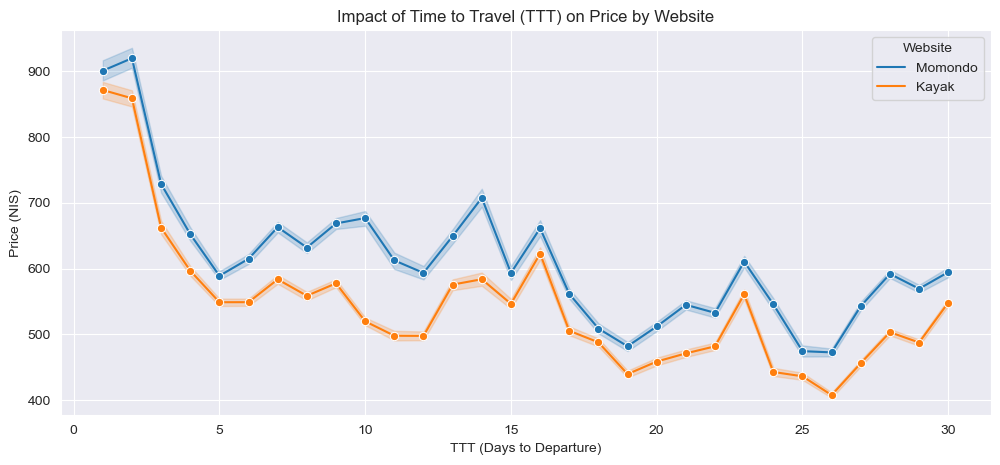

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ◊û◊ô◊§◊ï◊ô ◊ó◊ñ◊®◊î ◊ú◊©◊û◊ï◊™ ◊î◊ê◊™◊®◊ô◊ù
site_mapping = {0: "Momondo", 1: "Kayak"}
data_copy["Site"] = data_copy["Site"].map(site_mapping)

# Set figure size
plt.figure(figsize=(12, 5))

# Line plot: Average price for each TTT value per site
sns.lineplot(data=data_copy, x="TTT", y="Price(NIS)", hue="Site", marker="o")

# Graph styling
plt.title("Impact of Time to Travel (TTT) on Price by Website")
plt.xlabel("TTT (Days to Departure)")
plt.ylabel("Price (NIS)")
plt.legend(title="Website")

# Show plot
plt.show()


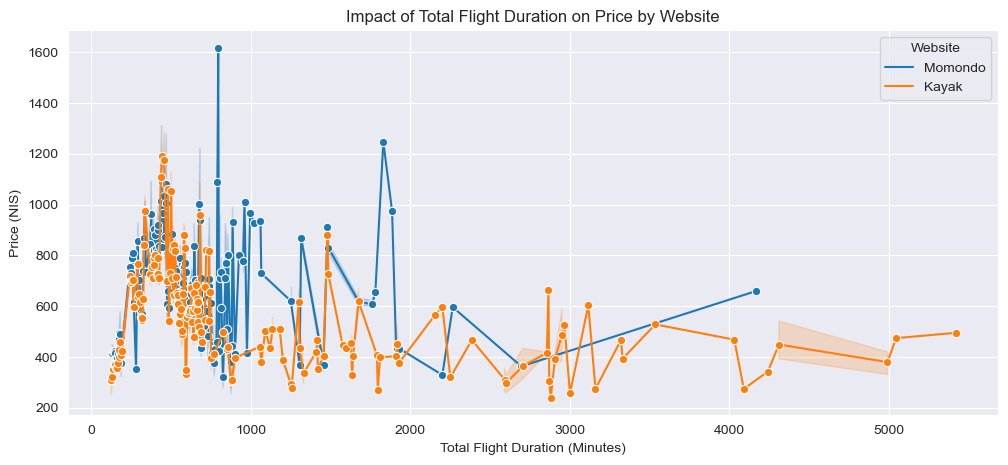

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new column for total flight duration (onward + return)
data_copy["Total Flight Duration (min)"] = data_copy["Total Onward Flight Duration(min)"] + data_copy["Onward Connection Duration(min)"] + data_copy["Total Return Flight Duration(min)"] + data_copy["Return Connection Duration(min)"]

# Set figure size
plt.figure(figsize=(12, 5))

# Line plot: Average price for each total flight duration value per site
sns.lineplot(data=data_copy, x="Total Flight Duration (min)", y="Price(NIS)", hue="Site", marker="o")

# Graph styling
plt.title("Impact of Total Flight Duration on Price by Website")
plt.xlabel("Total Flight Duration (Minutes)")
plt.ylabel("Price (NIS)")
plt.legend(title="Website")

# Show plot
plt.show()


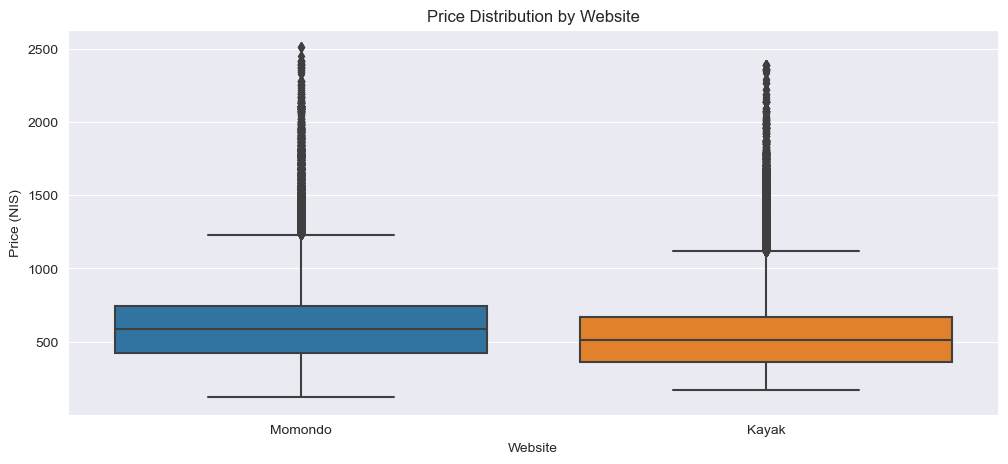

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(12, 5))

# Boxplot: Price distribution per website
sns.boxplot(data=data_copy, x="Site", y="Price(NIS)")

# Graph styling
plt.title("Price Distribution by Website")
plt.xlabel("Website")
plt.ylabel("Price (NIS)")

# Show plot
plt.show()


In [ ]:
import pandas as pd

# Calculate price statistics for each website
price_stats = data_copy.groupby("Site")["Price(NIS)"].agg(["min", "max", "median", "mean", "std", "count"]).reset_index()

# Calculate additional quantiles separately
price_stats["Q1 (25%)"] = data_copy.groupby("Site")["Price(NIS)"].quantile(0.25).values
price_stats["Q3 (75%)"] = data_copy.groupby("Site")["Price(NIS)"].quantile(0.75).values

# Rename columns for clarity
price_stats.columns = [
    "Website", "Min Price", "Max Price", "Median Price", "Mean Price", 
    "Standard Deviation", "Number of Flights", "Q1 (25%)", "Q3 (75%)"
]

# Transpose the table for better readability and round values to 2 decimal places
price_stats_transposed = price_stats.set_index("Website").T.round(2)

# Display the transposed table
display(price_stats_transposed)


Website                 Kayak   Momondo
Min Price              168.00    122.00
Max Price             2386.00   2509.00
Median Price           513.00    585.00
Mean Price             545.79    617.10
Standard Deviation     243.21    272.18
Number of Flights   102484.00  77013.00
Q1 (25%)               365.00    426.00
Q3 (75%)               666.00    747.00

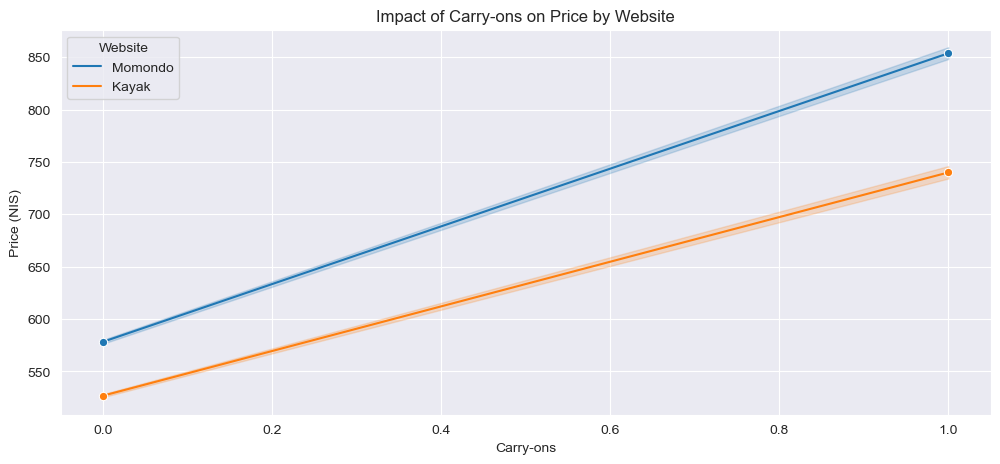

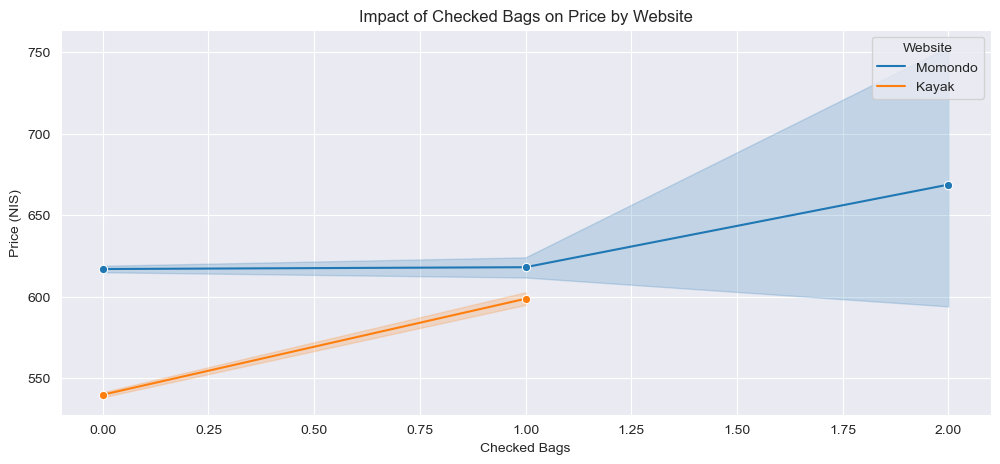

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert NaN values to 0 and change data type to integer
data_copy["Carry-ons"] = data_copy["Carry-ons"].fillna(0).astype(int)
data_copy["Checked Bags"] = data_copy["Checked Bags"].fillna(0).astype(int)

# Create a plot for Carry-ons impact on price
plt.figure(figsize=(12, 5))
sns.lineplot(data=data_copy, x="Carry-ons", y="Price(NIS)", hue="Site", marker="o")

# Styling
plt.title("Impact of Carry-ons on Price by Website")
plt.xlabel("Carry-ons")
plt.ylabel("Price (NIS)")
plt.legend(title="Website")

# Show plot
plt.show()

# Create a plot for Checked Bags impact on price
plt.figure(figsize=(12, 5))
sns.lineplot(data=data_copy, x="Checked Bags", y="Price(NIS)", hue="Site", marker="o")

# Styling
plt.title("Impact of Checked Bags on Price by Website")
plt.xlabel("Checked Bags")
plt.ylabel("Price (NIS)")
plt.legend(title="Website")

# Show plot
plt.show()


In [ ]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 179497 entries, 0 to 179503
Data columns (total 50 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Origin                             179497 non-null  object        
 1   Destination                        179497 non-null  object        
 2   TTT                                179497 non-null  int64         
 3   LOS                                179497 non-null  int64         
 4   Onward Departure Airport           179497 non-null  object        
 5   Onward Arrival Airport             179497 non-null  object        
 6   Return Departure Airport           179497 non-null  object        
 7   Return Arrival Airport             179497 non-null  object        
 8   Onward Flight Connections          179497 non-null  int64         
 9   Onward Connection Duration(min)    179497 non-null  int64         
 10  Onward Flight Connection 

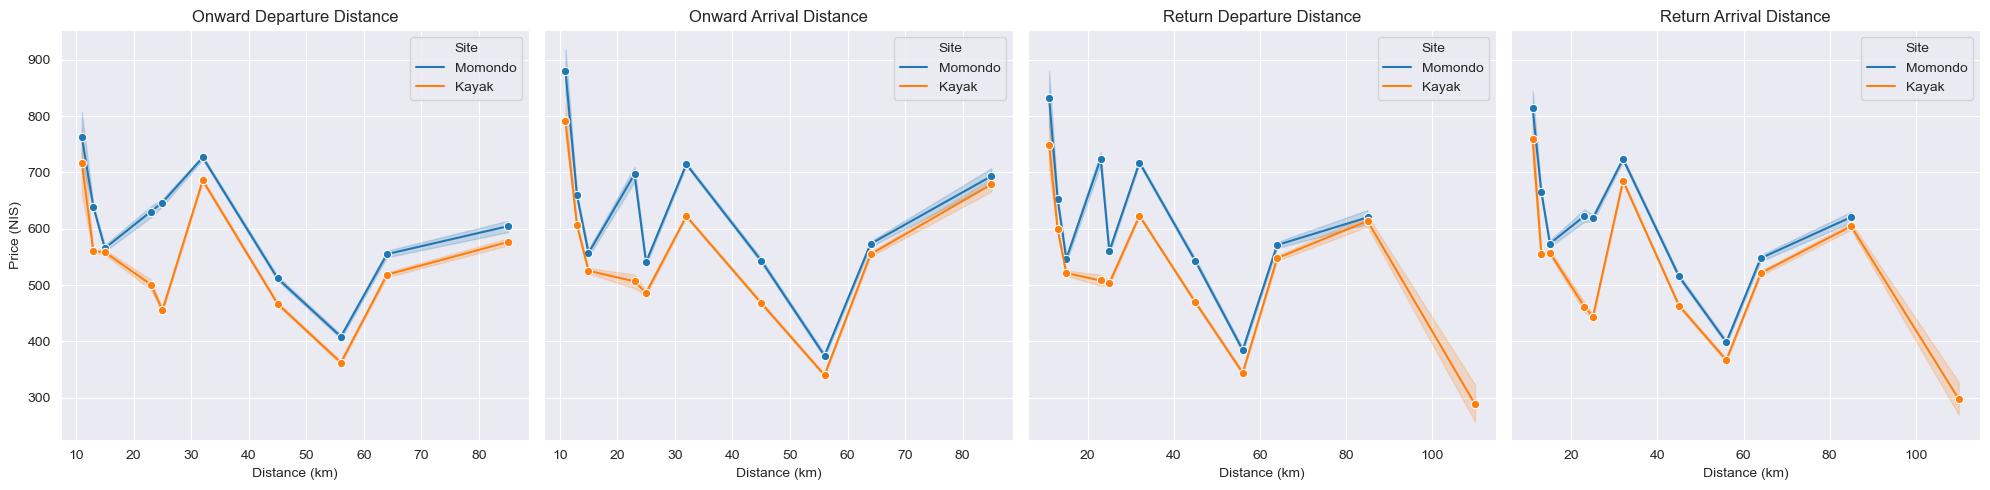

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ◊®◊©◊ô◊û◊™ ◊î◊û◊©◊™◊†◊ô◊ù ◊ú◊î◊¶◊í◊î
distance_columns = [
    "Onward Departure Airport Distance",
    "Onward Arrival Airport Distance",
    "Return Departure Airport Distance",
    "Return Arrival Airport Distance"
]

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊¢◊ù 4 ◊™◊™-◊í◊®◊§◊ô◊ù ◊ú◊î◊¶◊í◊™ ◊î◊©◊§◊¢◊™ ◊õ◊ú ◊û◊©◊™◊†◊î ◊¢◊ú ◊î◊û◊ó◊ô◊®
fig, axes = plt.subplots(1, 4, figsize=(20, 5), sharey=True)

# ◊õ◊ï◊™◊®◊ï◊™ ◊ú◊í◊®◊§◊ô◊ù
titles = [
    "Onward Departure Distance",
    "Onward Arrival Distance",
    "Return Departure Distance",
    "Return Arrival Distance"
]

# ◊ô◊¶◊ô◊®◊™ ◊õ◊ú ◊í◊®◊£
for i, col in enumerate(distance_columns):
    sns.lineplot(data=data_copy, x=col, y="Price(NIS)", hue="Site", marker="o", ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Distance (km)")

# ◊î◊ï◊°◊§◊™ ◊™◊ï◊ï◊ô◊™ Y ◊û◊©◊ï◊™◊§◊™
axes[0].set_ylabel("Price (NIS)")

# ◊î◊¶◊í◊™ ◊î◊í◊®◊§◊ô◊ù
plt.tight_layout()
plt.show()


C:\Users\talmo\AppData\Local\Temp\ipykernel_22404\4085528524.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
C:\Users\talmo\AppData\Local\Temp\ipykernel_22404\4085528524.py:34: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)


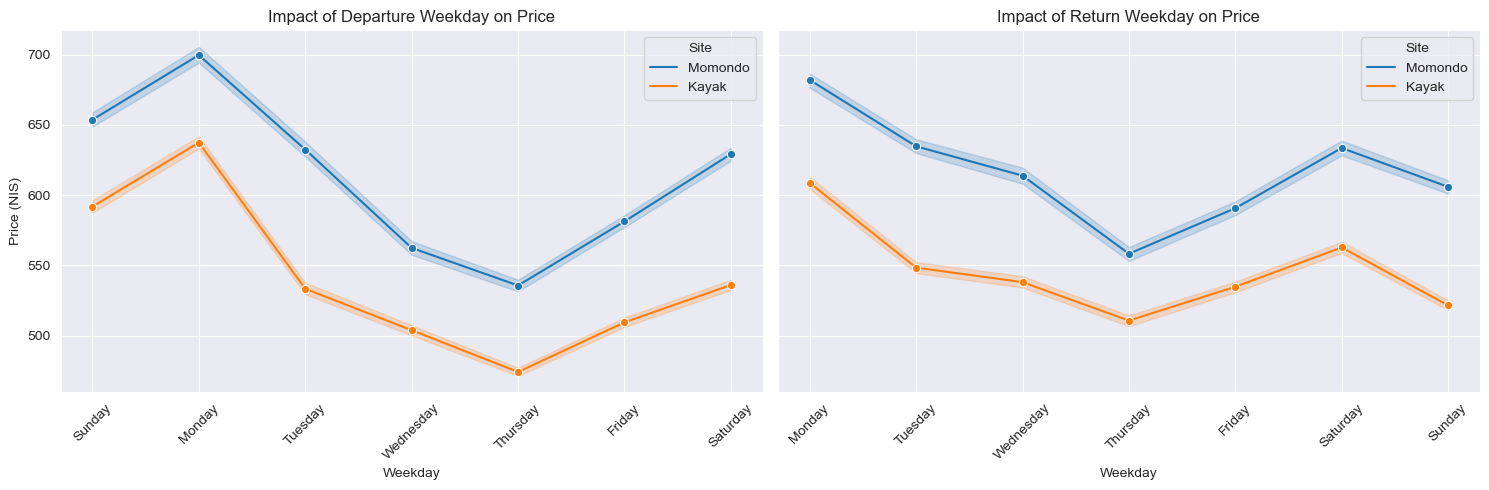

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ◊ô◊¶◊ô◊®◊™ ◊û◊ô◊ú◊ï◊ü ◊ú◊û◊ô◊§◊ï◊ô ◊û◊°◊§◊®◊ô ◊î◊©◊ë◊ï◊¢ ◊ú◊ô◊û◊ô◊ù
weekday_mapping = {
    0: "Monday", 1: "Tuesday", 2: "Wednesday", 3: "Thursday",
    4: "Friday", 5: "Saturday", 6: "Sunday"
}

# ◊î◊ó◊ú◊§◊™ ◊û◊°◊§◊®◊ô ◊î◊©◊ë◊ï◊¢ ◊ë◊©◊û◊ï◊™ ◊î◊ô◊û◊ô◊ù
data_copy["Departure Weekday"] = data_copy["Departure Weekday"].map(weekday_mapping)
data_copy["Return Weekday"] = data_copy["Return Weekday"].map(weekday_mapping)

# ◊®◊©◊ô◊û◊™ ◊î◊û◊©◊™◊†◊ô◊ù ◊ú◊î◊¶◊í◊î
weekday_columns = ["Departure Weekday", "Return Weekday"]

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊¢◊ù 2 ◊™◊™-◊í◊®◊§◊ô◊ù ◊ú◊î◊¶◊í◊™ ◊î◊©◊§◊¢◊™ ◊ô◊ï◊ù ◊î◊ô◊¶◊ô◊ê◊î ◊ï◊î◊ó◊ñ◊®◊î ◊¢◊ú ◊î◊û◊ó◊ô◊®
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# ◊õ◊ï◊™◊®◊ï◊™ ◊ú◊í◊®◊§◊ô◊ù
titles = ["Impact of Departure Weekday on Price", "Impact of Return Weekday on Price"]

# ◊ô◊¶◊ô◊®◊™ ◊õ◊ú ◊í◊®◊£
for i, col in enumerate(weekday_columns):
    sns.lineplot(data=data_copy, x=col, y="Price(NIS)", hue="Site", marker="o", ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Weekday")

# ◊î◊ï◊°◊§◊™ ◊™◊ï◊ï◊ô◊™ Y ◊û◊©◊ï◊™◊§◊™
axes[0].set_ylabel("Price (NIS)")

# ◊°◊ô◊ë◊ï◊ë ◊î◊™◊ï◊ï◊ô◊ï◊™ ◊ë◊¶◊ô◊® ◊î-X ◊õ◊ì◊ô ◊ú◊û◊†◊ï◊¢ ◊ó◊§◊ô◊§◊ï◊™
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

# ◊î◊¶◊í◊™ ◊î◊í◊®◊§◊ô◊ù
plt.tight_layout()
plt.show()


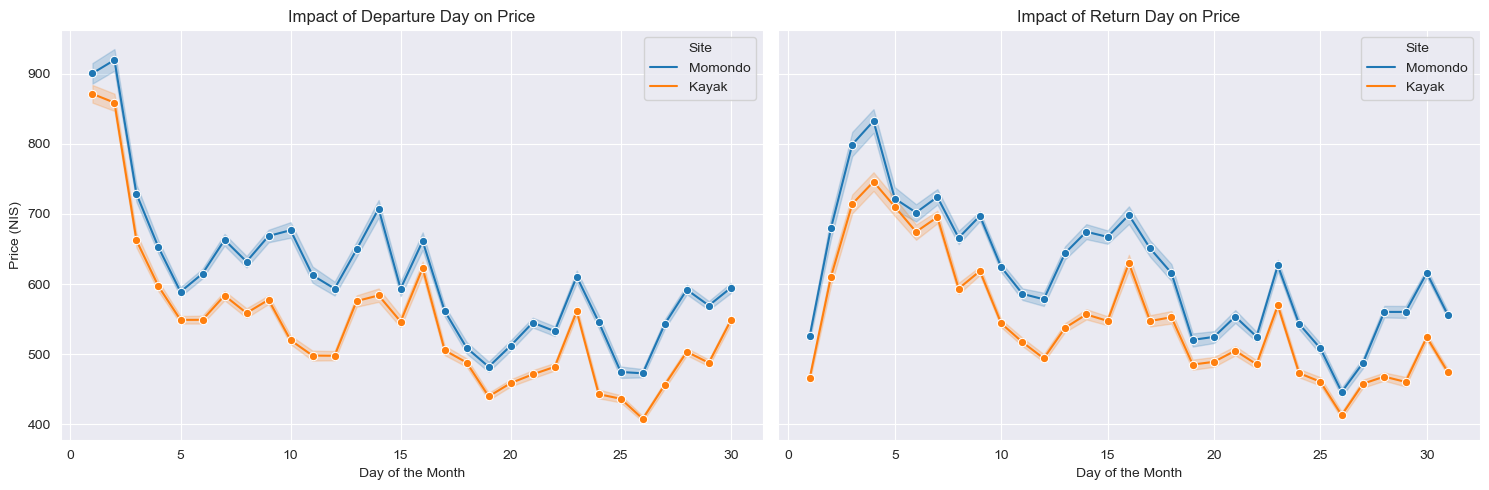

In [ ]:
# ◊®◊©◊ô◊û◊™ ◊î◊û◊©◊™◊†◊ô◊ù ◊ú◊î◊¶◊í◊î
day_columns = ["Departure Day", "Return Day"]

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊¢◊ù 2 ◊™◊™-◊í◊®◊§◊ô◊ù ◊ú◊î◊¶◊í◊™ ◊î◊©◊§◊¢◊™ ◊ô◊ï◊ù ◊î◊ô◊¶◊ô◊ê◊î ◊ï◊î◊ó◊ñ◊®◊î ◊¢◊ú ◊î◊û◊ó◊ô◊®
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# ◊õ◊ï◊™◊®◊ï◊™ ◊ú◊í◊®◊§◊ô◊ù
titles = ["Impact of Departure Day on Price", "Impact of Return Day on Price"]

# ◊ô◊¶◊ô◊®◊™ ◊õ◊ú ◊í◊®◊£
for i, col in enumerate(day_columns):
    sns.lineplot(data=data_copy, x=col, y="Price(NIS)", hue="Site", marker="o", ax=axes[i])
    axes[i].set_title(titles[i])
    axes[i].set_xlabel("Day of the Month")

# ◊î◊ï◊°◊§◊™ ◊™◊ï◊ï◊ô◊™ Y ◊û◊©◊ï◊™◊§◊™
axes[0].set_ylabel("Price (NIS)")

# ◊î◊¶◊í◊™ ◊î◊í◊®◊§◊ô◊ù
plt.tight_layout()
plt.show()


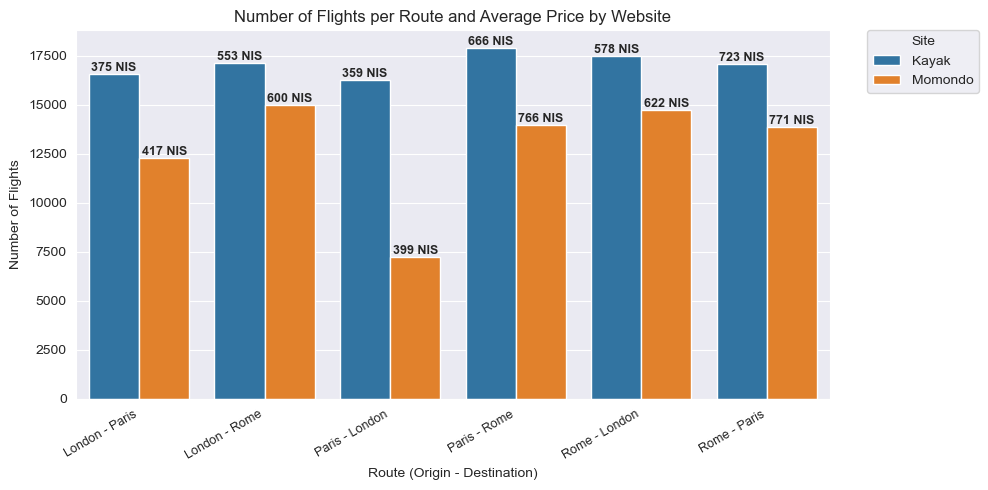

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# ◊ó◊ô◊©◊ï◊ë ◊õ◊û◊ï◊™ ◊î◊ò◊ô◊°◊ï◊™ ◊ú◊õ◊ú ◊û◊°◊ú◊ï◊ú ◊ï◊ú◊õ◊ú ◊ê◊™◊®
route_counts = data_copy.groupby(["Origin", "Destination", "Site"]).size().reset_index(name="Flight Count")

# ◊ó◊ô◊©◊ï◊ë ◊î◊û◊ó◊ô◊® ◊î◊û◊û◊ï◊¶◊¢ ◊ú◊õ◊ú ◊û◊°◊ú◊ï◊ú ◊ï◊ú◊õ◊ú ◊ê◊™◊®
route_avg_price = data_copy.groupby(["Origin", "Destination", "Site"])["Price(NIS)"].mean().reset_index()

# ◊û◊ô◊ñ◊ï◊í ◊î◊†◊™◊ï◊†◊ô◊ù ◊õ◊ö ◊©◊õ◊ú ◊û◊°◊ú◊ï◊ú ◊õ◊ï◊ú◊ú ◊í◊ù ◊õ◊û◊ï◊™ ◊ò◊ô◊°◊ï◊™ ◊ï◊í◊ù ◊û◊ó◊ô◊® ◊û◊û◊ï◊¶◊¢
route_summary = pd.merge(route_counts, route_avg_price, on=["Origin", "Destination", "Site"])

# ◊ô◊¶◊ô◊®◊™ ◊¢◊û◊ï◊ì◊î ◊ó◊ì◊©◊î ◊©◊û◊ê◊ó◊ì◊™ Origin ◊ï-Destination ◊ú◊©◊ù ◊û◊°◊ú◊ï◊ú
route_summary["Route"] = route_summary["Origin"] + " - " + route_summary["Destination"]

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊ß◊ò◊ü ◊ô◊ï◊™◊® ◊ï◊†◊ß◊ô ◊ô◊ï◊™◊®
fig, ax = plt.subplots(figsize=(10, 5))  # ◊©◊ô◊†◊ï◊ô ◊í◊ï◊ì◊ú ◊î◊í◊®◊£

# ◊ô◊¶◊ô◊®◊™ barplot ◊ú◊î◊¶◊í◊™ ◊õ◊û◊ï◊™ ◊î◊ò◊ô◊°◊ï◊™ ◊ú◊§◊ô ◊û◊°◊ú◊ï◊ú ◊ï◊ê◊™◊®
bar_plot = sns.barplot(
    data=route_summary, x="Route", y="Flight Count", hue="Site", dodge=True, ax=ax
)

# ◊î◊ï◊°◊§◊™ ◊™◊í◊ô◊ï◊™ ◊û◊ó◊ô◊® ◊û◊û◊ï◊¶◊¢ ◊û◊¢◊ú ◊õ◊ú ◊¢◊û◊ï◊ì◊î
for container, site in zip(bar_plot.containers, route_summary["Site"].unique()):
    prices = route_summary[route_summary["Site"] == site]["Price(NIS)"].values  # ◊û◊ë◊ò◊ô◊ó ◊©◊î◊™◊ï◊ï◊ô◊ï◊™ ◊û◊°◊ï◊†◊õ◊®◊†◊ï◊™ ◊¢◊ù ◊î◊†◊™◊ï◊†◊ô◊ù
    bar_plot.bar_label(container, labels=[f"{p:.0f} NIS" for p in prices], label_type="edge", fontsize=9, fontweight="bold")

# ◊õ◊ï◊™◊®◊™ ◊ï◊¶◊ô◊®◊ô◊ù
ax.set_title("Number of Flights per Route and Average Price by Website", fontsize=12)  # ◊î◊ß◊ò◊†◊™ ◊õ◊ï◊™◊®◊™
ax.set_xlabel("Route (Origin - Destination)", fontsize=10)
ax.set_ylabel("Number of Flights", fontsize=10)

# ◊°◊ô◊ë◊ï◊ë ◊î◊™◊ï◊ï◊ô◊ï◊™ ◊ë◊¶◊ô◊® ◊î-X ◊ú◊ñ◊ï◊ï◊ô◊™ ◊¢◊ì◊ô◊†◊î ◊ô◊ï◊™◊®
ax.set_xticklabels(route_summary["Route"].unique(), rotation=30, ha='right', fontsize=9)

# ◊©◊ô◊†◊ï◊ô ◊û◊ô◊ß◊ï◊ù ◊î◊û◊ß◊®◊ê ◊û◊ó◊ï◊• ◊ú◊í◊®◊£
plt.legend(title="Site", bbox_to_anchor=(1.05, 1), loc="upper left", borderaxespad=0)

# ◊î◊¶◊í◊™ ◊î◊í◊®◊£
plt.tight_layout()
plt.show()


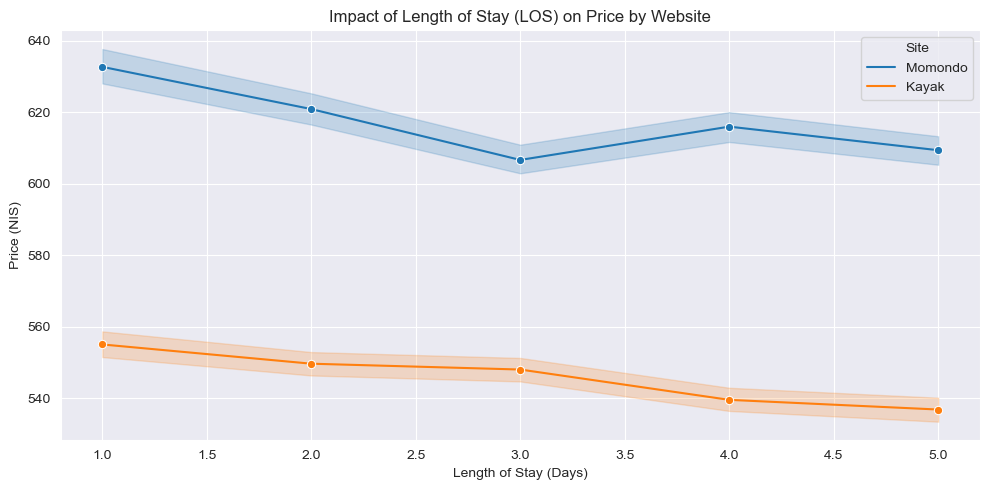

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊ß◊ï ◊ú◊î◊¶◊í◊™ ◊î◊©◊§◊¢◊™ LOS ◊¢◊ú ◊î◊û◊ó◊ô◊® ◊ë◊õ◊ú ◊ê◊™◊®
plt.figure(figsize=(10, 5))

sns.lineplot(data=data_copy, x="LOS", y="Price(NIS)", hue="Site", marker="o")

# ◊î◊í◊ì◊®◊ï◊™ ◊í◊®◊£
plt.title("Impact of Length of Stay (LOS) on Price by Website", fontsize=12)
plt.xlabel("Length of Stay (Days)", fontsize=10)
plt.ylabel("Price (NIS)", fontsize=10)
plt.legend(title="Site")

# ◊î◊¶◊í◊™ ◊î◊í◊®◊£
plt.tight_layout()
plt.show()


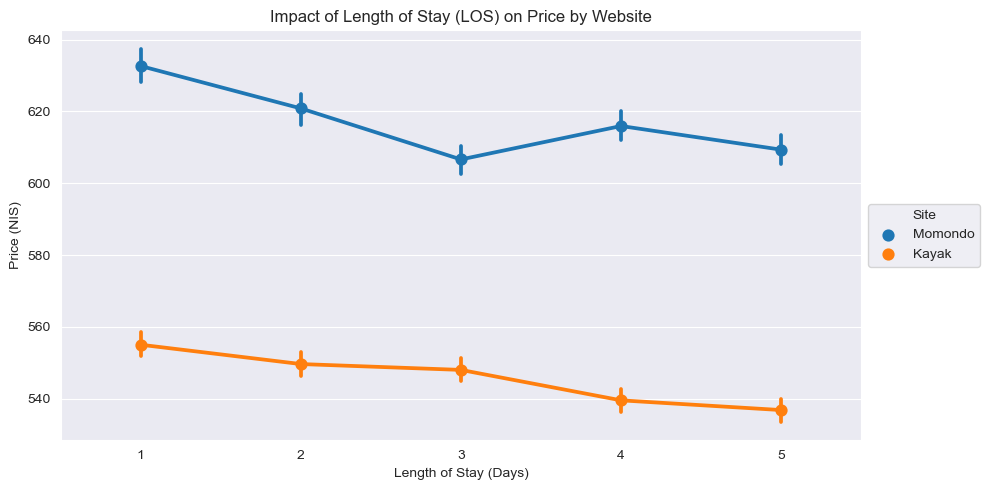

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ Pointplot ◊ú◊î◊¶◊í◊™ ◊û◊í◊û◊™ ◊î◊û◊ó◊ô◊®◊ô◊ù ◊ú◊§◊ô LOS
plt.figure(figsize=(10, 5))
sns.pointplot(data=data_copy, x="LOS", y="Price(NIS)", hue="Site", markers="o", linestyles="-")

# ◊î◊ï◊°◊§◊™ ◊õ◊ï◊™◊®◊ï◊™ ◊ï◊™◊ï◊ï◊ô◊ï◊™
plt.title("Impact of Length of Stay (LOS) on Price by Website")
plt.xlabel("Length of Stay (Days)")
plt.ylabel("Price (NIS)")

# ◊î◊¶◊í◊™ ◊î◊û◊ß◊®◊ê ◊û◊ó◊ï◊• ◊ú◊í◊®◊£
plt.legend(title="Site", loc="center left", bbox_to_anchor=(1, 0.5))

# ◊î◊¶◊í◊™ ◊î◊í◊®◊£
plt.tight_layout()
plt.show()


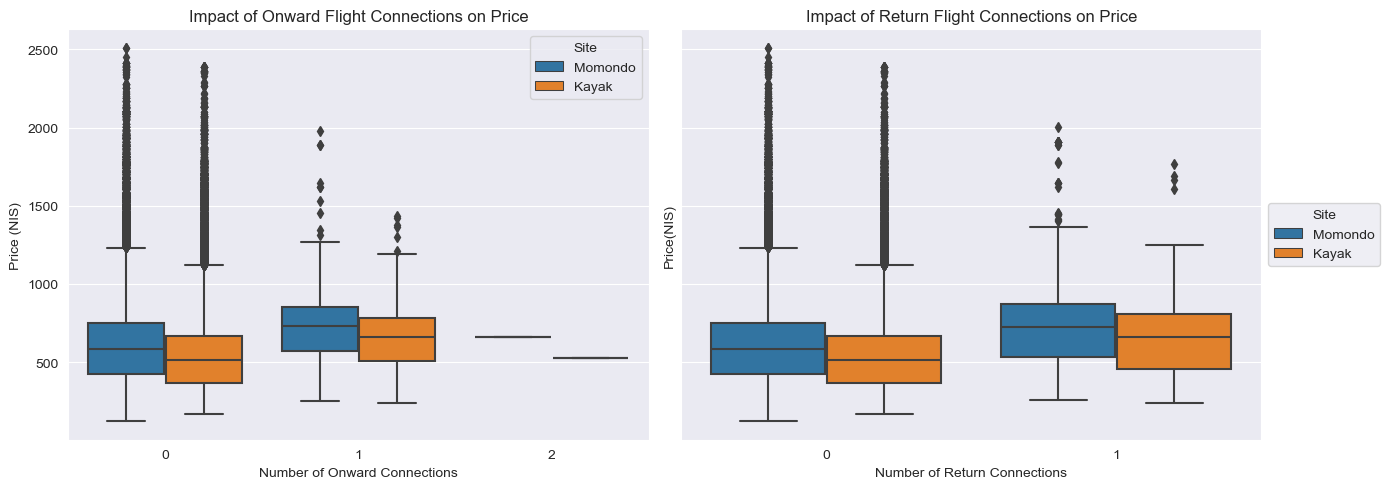

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊¢◊ù ◊©◊†◊ô ◊™◊™-◊í◊®◊§◊ô◊ù (Onward & Return Flight Connections)
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

# Boxplot ◊¢◊ë◊ï◊® ◊õ◊û◊ï◊™ ◊î◊ß◊ï◊†◊ß◊©◊†◊ô◊ù ◊ë◊î◊ú◊ï◊ö
sns.boxplot(data=data_copy, x="Onward Flight Connections", y="Price(NIS)", hue="Site", ax=axes[0])
axes[0].set_title("Impact of Onward Flight Connections on Price")
axes[0].set_xlabel("Number of Onward Connections")
axes[0].set_ylabel("Price (NIS)")

# Boxplot ◊¢◊ë◊ï◊® ◊õ◊û◊ï◊™ ◊î◊ß◊ï◊†◊ß◊©◊†◊ô◊ù ◊ë◊ó◊ñ◊ï◊®
sns.boxplot(data=data_copy, x="Return Flight Connections", y="Price(NIS)", hue="Site", ax=axes[1])
axes[1].set_title("Impact of Return Flight Connections on Price")
axes[1].set_xlabel("Number of Return Connections")

# ◊î◊¶◊í◊™ ◊î◊û◊ß◊®◊ê ◊û◊ó◊ï◊• ◊ú◊í◊®◊£
axes[1].legend(title="Site", loc="center left", bbox_to_anchor=(1, 0.5))

# ◊î◊™◊ê◊û◊™ ◊î◊™◊¶◊ï◊í◊î
plt.tight_layout()
plt.show()


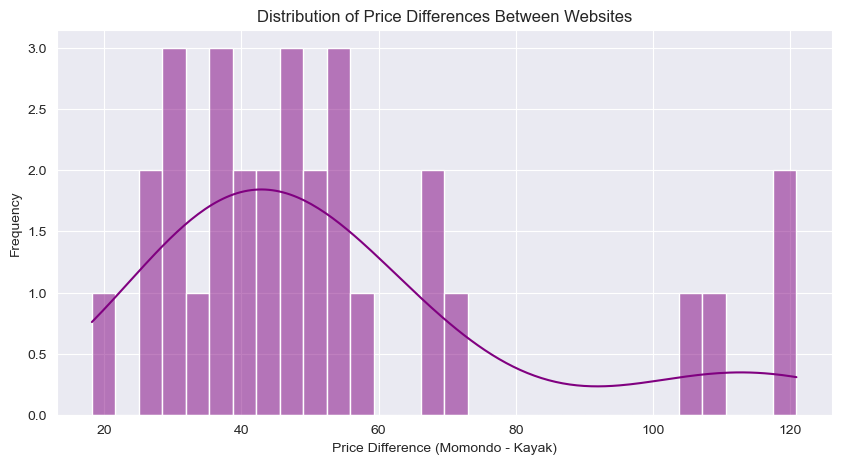

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ◊ó◊ô◊©◊ï◊ë ◊î◊û◊ó◊ô◊®◊ô◊ù ◊ú◊õ◊ú ◊û◊°◊ú◊ï◊ú ◊ï◊ú◊õ◊ú ◊ê◊™◊®
price_by_site = data_copy.groupby(["Origin", "Destination", "LOS", "Site"])["Price(NIS)"].mean().unstack()

# ◊ó◊ô◊©◊ï◊ë ◊î◊î◊§◊®◊© ◊ë◊ô◊ü ◊î◊û◊ó◊ô◊®◊ô◊ù ◊©◊ú Momondo ◊ï-Kayak
price_by_site["Price Difference"] = price_by_site["Momondo"] - price_by_site["Kayak"]

# ◊ô◊¶◊ô◊®◊™ ◊í◊®◊£ ◊î◊ô◊°◊ò◊ï◊í◊®◊û◊î ◊ú◊î◊¶◊í◊™ ◊î◊™◊§◊ú◊í◊ï◊™ ◊î◊§◊®◊©◊ô ◊î◊û◊ó◊ô◊®◊ô◊ù
plt.figure(figsize=(10, 5))
sns.histplot(price_by_site["Price Difference"], kde=True, bins=30, color="purple")

# ◊î◊ï◊°◊§◊™ ◊õ◊ï◊™◊®◊ï◊™
plt.title("Distribution of Price Differences Between Websites")
plt.xlabel("Price Difference (Momondo - Kayak)")
plt.ylabel("Frequency")

# ◊î◊¶◊í◊™ ◊î◊í◊®◊£
plt.show()
